PCA example
Using breast cancer data, number of features = 30

In [2]:
# Re-importing necessary libraries after reset
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

print("Number of features in the dataset:", X.shape[1])



Number of features in the dataset: 30


Standardization

In [3]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


PCA, decomposition now

In [4]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Print out the eigenvalues
print("Eigenvalues of each principal component:", pca.explained_variance_)



Eigenvalues of each principal component: [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 3.12142606e-02
 3.00256631e-02 2.74877113e-02 2.43836914e-02 1.80867940e-02
 1.55085271e-02 8.19203712e-03 6.91261258e-03 1.59213600e-03
 7.50121413e-04 1.33279057e-04]


Choose the number of eigenvalues

Components to keep based on eigenvalue criterion: 6
Eigenvalue:  [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 3.12142606e-02
 3.00256631e-02 2.74877113e-02 2.43836914e-02 1.80867940e-02
 1.55085271e-02 8.19203712e-03 6.91261258e-03 1.59213600e-03
 7.50121413e-04 1.33279057e-04]
Number of components to explain 90% variance: 7
Explained variance:  [0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


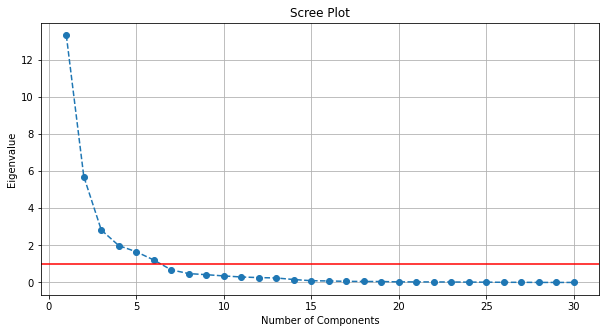

In [5]:
# Eigenvalues
explained_variance = pca.explained_variance_

# Components with eigenvalues > 1
components_to_keep = explained_variance > 1
print("Components to keep based on eigenvalue criterion:", components_to_keep.sum())
print("Eigenvalue: ", explained_variance)


# Cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to explain desired variance, e.g., 90%
variance_threshold = 0.9
components_needed = np.argmax(cumulative_variance_ratio >= variance_threshold) + 1
print("Number of components to explain 90% variance:", components_needed)
print("Explained variance: ", cumulative_variance_ratio)


plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='-')  # Eigenvalue = 1 line
plt.grid(True)
plt.show()

# Use the plot to visually determine the 'elbow' where the eigenvalues start to level off


Create a Dataframe with the PCA results. Let's assume we pick 3 components.

In [6]:
# Create a DataFrame for the first 3 components
pca_df_top3 = pd.DataFrame(X_pca[:, :3], columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

print(pca_df_top3.head())


   Principal Component 1  Principal Component 2  Principal Component 3
0               9.192837               1.948583              -1.123166
1               2.387802              -3.768172              -0.529293
2               5.733896              -1.075174              -0.551748
3               7.122953              10.275589              -3.232790
4               3.935302              -1.948072               1.389767


Printing the principal components by PC1 vs PC2, PC1 vs PC3, and PC2 vs PC3

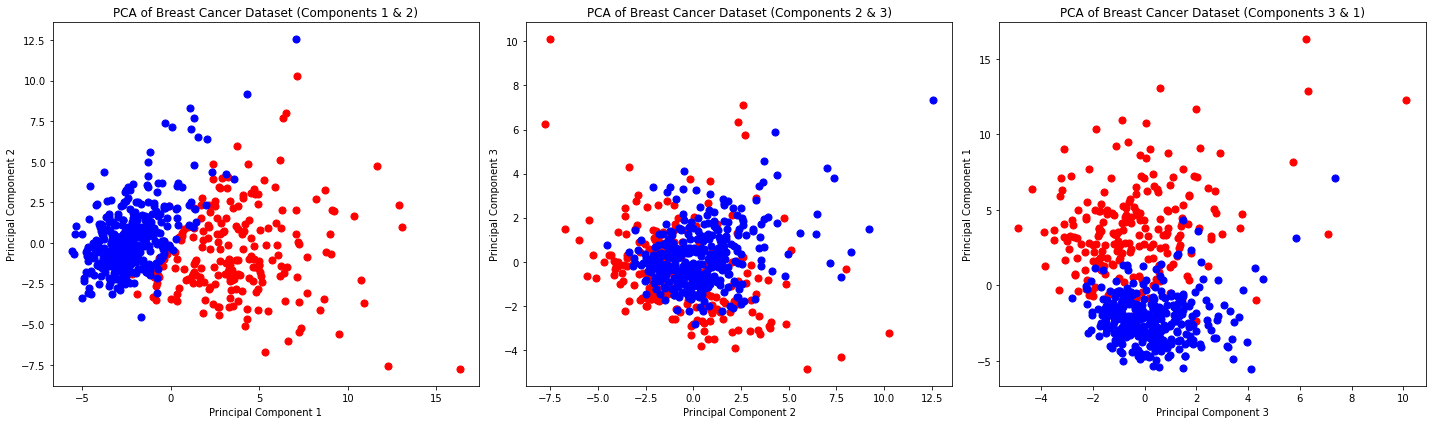

In [8]:
# Plotting the principal components
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
colors = ['r', 'b']

for i, ax in enumerate(axes.flatten(), start=1):
    for target, color in zip(np.unique(y), colors):
        ax.scatter(pca_df_top3.loc[y == target, f'Principal Component {i}'],
                   pca_df_top3.loc[y == target, f'Principal Component {(i % 3) + 1}'],
                   c=color, s=50)
    ax.set_xlabel(f'Principal Component {i}')
    ax.set_ylabel(f'Principal Component {(i % 3) + 1}')
    ax.set_title(f'PCA of Breast Cancer Dataset (Components {i} & {(i % 3) + 1})')

plt.tight_layout()
plt.show()



Principal Component 1 seems can do a good clustering job!
So what features contributed "most" in Principal Component 1?

In [12]:
# To show all columns
pd.set_option('display.max_columns', None)

# Access the principal axes (loadings)
loadings = pca.components_

# Create a DataFrame to make the loadings easier to understand
features = data.feature_names
loadings_df = pd.DataFrame(data=loadings, columns=features, index=[f'Principal Component {i}' for i in range(1, X.shape[1]+1)])

print(loadings_df)


                        mean radius  mean texture  mean perimeter  mean area  \
Principal Component 1      0.218902      0.103725        0.227537   0.220995   
Principal Component 2     -0.233857     -0.059706       -0.215181  -0.231077   
Principal Component 3     -0.008531      0.064550       -0.009314   0.028700   
Principal Component 4      0.041409     -0.603050        0.041983   0.053434   
Principal Component 5      0.037786     -0.049469        0.037375   0.010331   
Principal Component 6      0.018741     -0.032179        0.017308  -0.001888   
Principal Component 7     -0.124088      0.011400       -0.114477  -0.051653   
Principal Component 8     -0.007452      0.130675       -0.018687   0.034674   
Principal Component 9     -0.223110      0.112699       -0.223739  -0.195586   
Principal Component 10     0.095486      0.240934        0.086386   0.074956   
Principal Component 11     0.041471     -0.302243        0.016783   0.110170   
Principal Component 12     0.051067     

Parameter that you can change for pca = PCA()
1. n_components:
   a. by default, same number as the input data
   b. if you enter an integer, e.g. n_components = 3, you are choosing 3 principal components only
   c. if you enter a number >0 and <1, e.g. n_components = 0.9, you are choosing the variance explained >= 90%
   d. if you type 'mle', i.e. n_components = 'mle', PCA will use Minka’s MLE (Maximum Likelihood Estimation) to guess the dimensionality of inputs. This option is only supported if the number of samples is greater than or equal to the number of features.
   
2. whiten:
    a. by dafault, it is False. When True, PCA will "whiten" the data, which means scaling the components to have unit variance. If you have standardized the data, you don't need to consider about this.

Some other choices for svd_solver, tol, random_state, copy. You may refer these in the documentation. But we seldom use it.

In [29]:
# Apply PCA
#pca = PCA(n_components=3)
#pca = PCA(n_components=0.9)
pca = PCA(n_components='mle')
X_pca = pca.fit_transform(X_scaled)

# Print out the eigenvalues
print("Eigenvalues of each principal component:", pca.explained_variance_)

Eigenvalues of each principal component: [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 3.12142606e-02
 3.00256631e-02 2.74877113e-02 2.43836914e-02 1.80867940e-02
 1.55085271e-02 8.19203712e-03 6.91261258e-03 1.59213600e-03
 7.50121413e-04]
